In [1]:
from matplotlib.pyplot import (figure, subplot, plot, xlabel, ylabel, title, yticks, show,legend,imshow, cm)
from scipy.io import loadmat
import scipy.linalg as linalg
import numpy as np

In [2]:
n = [0,1]
K = 16
nD = range(6);

In [3]:
traindata = loadmat('data/zipdata.mat')['traindata']
X = traindata[:,1:]
y = traindata[:,0]

In [4]:
N,M = X.shape
C = len(n)
classValues = n
classNames = [str(num) for num in n]
classDict = dict(zip(classNames,classValues))

In [5]:
class_mask = np.zeros(N).astype(bool)
for v in n:
    cmsk = (y == v)
    class_mask = class_mask | cmsk
X = X[class_mask,:]
y = y[class_mask]
N=X.shape[0]

In [6]:
# Center the data (subtract mean column values)
Xc = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,V = linalg.svd(Xc,full_matrices=False)
#U = mat(U)
V = V.T

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

# Project data onto principal component space
Z = Xc @ V

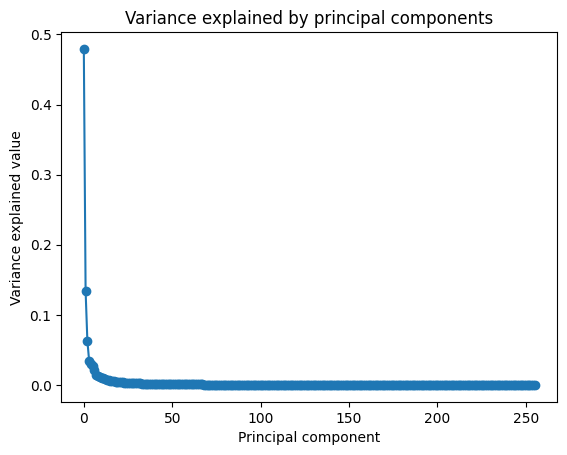

In [7]:
figure()
plot(rho,'o-')
title('Variance explained by principal components');
xlabel('Principal component');
ylabel('Variance explained value');

Text(0, 0.5, 'PC2')

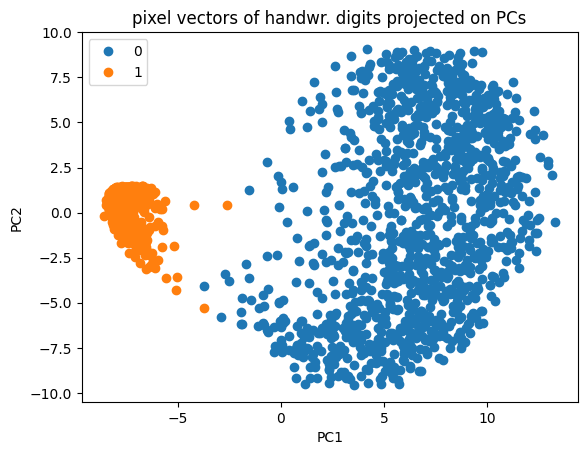

In [8]:
f = figure()
title('pixel vectors of handwr. digits projected on PCs')
for c in n:
    # select indices belonging to class c:
    class_mask = (y == c)
    plot(Z[class_mask,0], Z[class_mask,1], 'o')
legend(classNames)
xlabel('PC1')
ylabel('PC2')

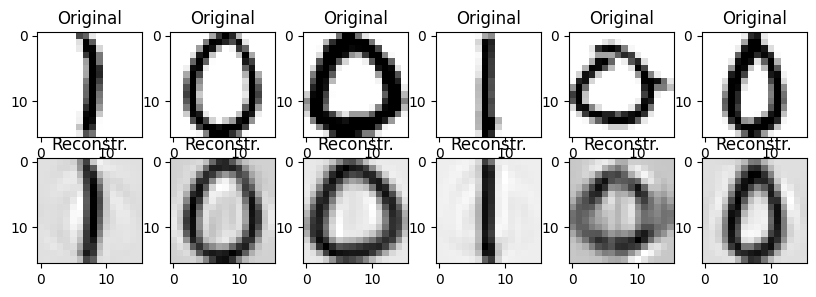

In [9]:
figure(figsize=(10,3))
W = Z[:,range(K)] @ V[:,range(K)].T
D = len(nD)
for d in range(D):
    digit_ix = np.random.randint(0,N)
    subplot(2, D, d+1)
    I = np.reshape(X[digit_ix,:], (16,16))
    imshow(I, cmap=cm.gray_r)
    title('Original')
    subplot(2, D, D+d+1)
    I = np.reshape(W[digit_ix,:]+X.mean(0), (16,16))
    imshow(I, cmap=cm.gray_r)
    title('Reconstr.');

In [10]:
figure(figsize=(8,6))
for k in range(K):
    N1 = np.ceil(np.sqrt(K)); N2 = np.ceil(K/N1)
    subplot(N2, N1, k+1)
    I = np.reshape(V[:,k], (16,16))
    imshow(I, cmap=cm.hot)
    title('PC{0}'.format(k+1));
show()

ValueError: Number of rows must be a positive integer, not 4.0

<Figure size 800x600 with 0 Axes>